In [1]:
# so we see changes in populations of salt-bridge on and off in ERK2, let's see if we can build a 2 state MSM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import seaborn as sns
sns.set_style('ticks')

In [3]:
distances2 = np.load('distances2.npy')
dist2_concat = np.concatenate([distances2[i][0][100:] for i in range(len(distances2))])

In [4]:
distances3 = np.load('distances3.npy')
dist3_concat = np.concatenate([distances3[i][0][100:] for i in range(len(distances3))])

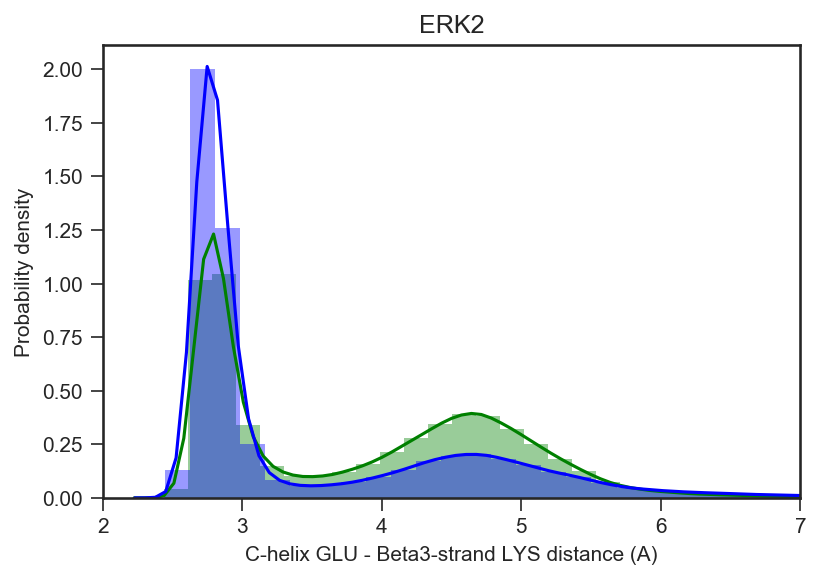

In [7]:
plt.figure(dpi=150)
sns.distplot(dist2_concat*10, color='green')
sns.distplot(dist3_concat*10, color='blue')
plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2')
plt.show()

In [23]:
dtraj2 = []
dtraj3 = []

for traj in distances2:
    dtraj2.append((np.concatenate(traj[0]) < 0.35).astype('int'))
    
for traj in distances3:
    dtraj3.append((np.concatenate(traj[0]) < 0.35).astype('int'))    

In [30]:
import pyemma

In [31]:
its = pyemma.msm.its(dtraj2)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

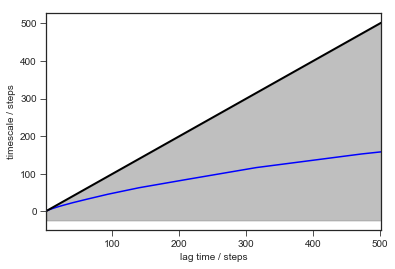

In [33]:
pyemma.plots.plot_implied_timescales(its, ylog=False)

In [34]:
# ok so gotta try other features - trying all distances between residues starting 10 res before the 1st salt bridge residue
# and ending 10 residues after the second one

In [35]:
# files are big (3G) - so continuing on the cluster

In [36]:
# back here with tica correlations

In [37]:
pwd

'/Users/rafalpwiewiora/repos/ERK'

In [129]:
wt_corr = np.load('erk2_wt_moredist_tica_corr.npy')

In [130]:
mut_corr = np.load('erk2_mut_moredist_tica_corr.npy')

In [131]:
wt_corr.shape

(703, 142)

In [132]:
mut_corr.shape

(741, 298)

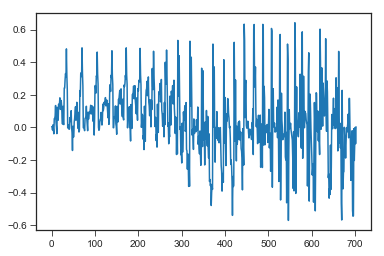

In [133]:
plt.plot(wt_corr[:,0])

In [134]:
# import itertools

In [135]:
# contacts_wt = [list(x) for x in list(itertools.combinations(np.arange(40,78), 2))]

In [136]:
# len(contacts_wt)

In [137]:
# np.array(contacts_wt)[np.argsort(np.abs(wt_corr[:,0]))[::-1][:10]]

In [66]:
# no this is not useful - let's see what the coefficients over all tics are for that one salt bridge feature 
# (67-50)

In [138]:
for i in range(len(contacts_wt)):
    if contacts_wt[i] == [50,67]:
        print(i)

341


In [139]:
contacts_wt[341]

[50, 67]

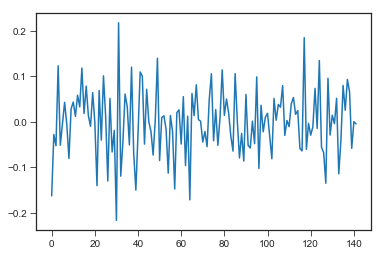

In [140]:
plt.plot(wt_corr[341,:])

In [141]:
np.argsort(np.abs(wt_corr[341,:]))[::-1]

array([ 31,  30, 117,  64,   0,  39,  57,  21,  49, 124, 127,  26,   3,
        37,  32,  14,  79, 133,  54,  41,  85,  74,  96,  24,  42,  95,
        62, 128, 137,  89,  50,  67, 102,   8, 135, 107,  87,  16, 122,
        47,  44,  38,  22, 126,  28, 138,  19,  84, 116,  65,  34,  90,
       118,  12, 115, 139,  92, 125,  61,  72, 112,   2, 132,  27, 103,
        77,   4,  91,  36,  81,  73,  43,  60,  94,  70,  33,  10,   6,
        75, 134,  23, 111, 105,  97,  35,  13, 106, 101,  83, 108, 120,
       129,   9,   1,  76,  59,  40, 136,  88, 114,  98,  71,  56,  46,
        58,  82, 100,  29,  15, 113,  53, 130,  80, 123,  55,  66,  17,
        52,  63,  25,  11, 121, 110,  99,  51,  78,  18,   7,  68,   5,
       141,  48, 131, 104, 119, 109,  86,  93,  69,  20,  45, 140])

In [145]:
wt_corr[341,:][0]

-0.16230473038236995

In [75]:
# ok so we got it in tic0 then

In [76]:
# let's get tica output for tic0 then, see how the salt bridge correlates 

In [85]:
tic0 = np.concatenate([x[100:] for x in np.load('erk2_wt_tic0.npy')])

In [146]:
tic0.shape

(904015, 1)

In [147]:
dist2_concat.shape

(904015, 1)

In [148]:
tic0_ = np.concatenate(tic0[::10000])

In [149]:
dist2_ = np.concatenate(dist2_concat[::10000])

In [124]:
# dist2_bin = []

# for frame in dist2_:
#     if frame < 0.35:
#         dist2_bin.append(1)
#     else:
#         dist2_bin.append(0)
        
# dist2_bin = np.array(dist2_bin)        

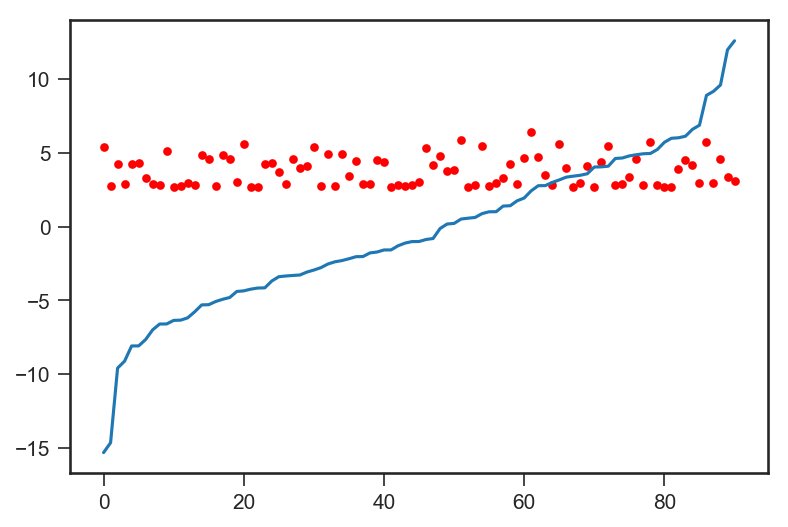

In [158]:
plt.figure(dpi=150)
plt.plot(np.sort(tic0_))
plt.scatter(range(len(tic0_)), dist2_[np.argsort(tic0_)]*10, s=10, color='red')

In [127]:
import scipy

In [159]:
scipy.stats.pearsonr(np.argsort(tic0_), dist2_[np.argsort(tic0_)])

(0.10709018294283097, 0.31232179404296806)

In [161]:
# ok let's forget this salt bridge, and look in general at an MSM in this limited residue space

In [162]:
# back with dtrajs

In [292]:
dtrajs = np.load('dist2_more_dtrajs.npy')
dtrajs = [np.concatenate(x) for x in dtrajs]

In [168]:
its = pyemma.msm.its(dtrajs)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

04-12-18 00:43:50 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[4] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


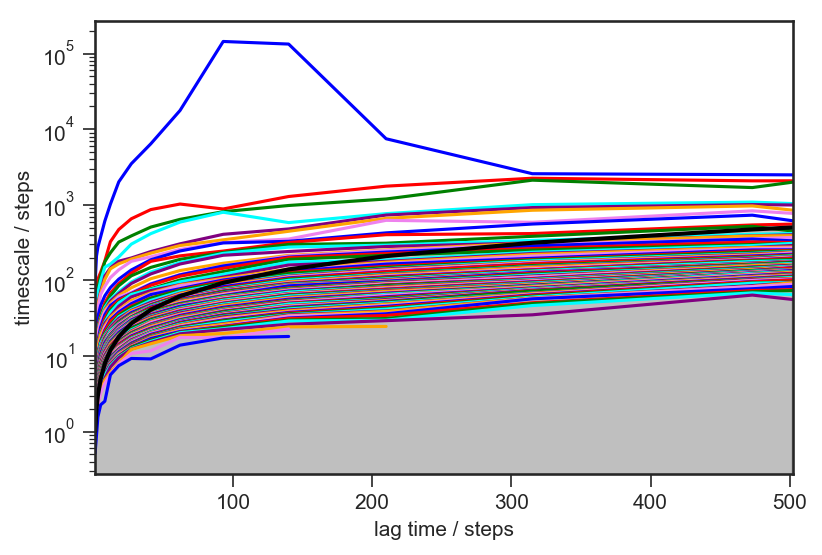

In [170]:
plt.figure(dpi=150)
pyemma.plots.plot_implied_timescales(its)

In [293]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)

In [294]:
msm.nstates

98

In [175]:
pcca = msm.pcca(s10)

In [176]:
pcca.coarse_grained_stationary_probability

array([ 0.00350518,  0.00424532,  0.00600772,  0.0068666 ,  0.00638575,
        0.1398578 ,  0.10392104,  0.03654389,  0.17133764,  0.52132907])

In [264]:
pcca.metastable_sets

[array([ 9, 34]),
 array([67]),
 array([29]),
 array([12, 82]),
 array([16]),
 array([13, 14, 22, 30, 44, 47, 69, 70, 75]),
 array([19]),
 array([74]),
 array([15, 18, 36, 43, 78, 97]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 17, 20, 21, 23, 24, 25,
        26, 27, 28, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 45, 46, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        68, 71, 72, 73, 76, 77, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90,
        91, 92, 93, 94, 95, 96])]

In [295]:
pcca2 = msm.pcca(2)

In [296]:
pcca2.coarse_grained_stationary_probability

array([ 0.04708751,  0.95291249])

In [297]:
pcca2.metastable_sets

[array([12, 74, 82]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87,
        88, 89, 90, 91, 92, 93, 94, 95, 96, 97])]

In [298]:
meta_sets = [[], []]

for state in pcca2.metastable_sets[0]:
    meta_sets[0].append(msm.active_set[state])
    
for state in pcca2.metastable_sets[1]:
    meta_sets[1].append(msm.active_set[state])
    
meta_sets = np.array(meta_sets)    

In [299]:
meta_sets

array([[12, 76, 84],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], dtype=object)

In [179]:
# ok maybe we have something here - let's look at correlations of features with the 2nd eigenvector

In [182]:
msm.eigenvectors_right(2)[:,1]

(98,)

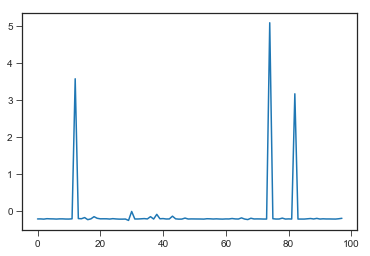

In [184]:
plt.plot(msm.eigenvectors_right(2)[:,1])

In [185]:
np.argsort(msm.eigenvectors_right(2)[:,1])

array([29, 16, 67, 45, 27, 26,  2, 53, 59, 46,  6, 79, 95, 85, 10, 84, 83,
       73, 23, 72, 76, 66, 64, 37,  9, 90, 81, 28, 58, 94, 48, 56, 52, 77,
       41, 31, 51, 88, 32, 61, 69, 92, 93, 50, 25, 71, 42,  0, 35, 63, 60,
       49,  1, 70,  5, 80,  8,  7, 17, 57,  4, 44, 55, 91, 20, 11, 33, 22,
       86, 21, 39, 96, 54, 14, 75,  3, 24, 34, 40, 13, 62, 87, 89, 97, 19,
       68, 78, 47, 65, 15, 18, 36, 43, 38, 30, 82, 12, 74])

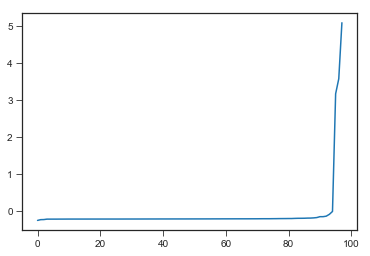

In [186]:
plt.plot(msm.eigenvectors_right(2)[:,1][np.argsort(msm.eigenvectors_right(2)[:,1])])

In [187]:
# get 10 samples per state

In [197]:
msm.active_state_indexes[0]

array([  1, 270])

In [201]:
eigen_traj = []

for state in np.argsort(msm.eigenvectors_right(2)[:,1]):
    eigen_traj.append(msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 10, replace=False)])

In [205]:
eigen_traj = np.concatenate(eigen_traj)

In [206]:
eigen_traj.shape

(980, 2)

In [207]:
np.save('eigen_traj', eigen_traj)

In [208]:
eigen_traj_dist = np.load('eigen_traj_dist2.npy')

In [216]:
eigen_traj_dist.shape

(980, 703)

In [225]:
sorted_eigenv = msm.eigenvectors_right(2)[:,1][np.argsort(msm.eigenvectors_right(2)[:,1])]
sorted_eigenv = np.concatenate([[x]*10 for x in sorted_eigenv])

In [229]:
np.corrcoef(sorted_eigenv, eigen_traj_dist[:,0])[0,1]

-0.073176983769062121

In [241]:
corr_coeffs = []

for i in range(703):
    corr_coeffs.append(np.corrcoef(sorted_eigenv, eigen_traj_dist[:,i])[0,1])

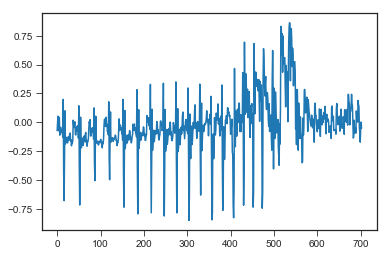

In [234]:
plt.plot(corr_coeffs)

In [243]:
np.argsort(np.abs(corr_coeffs))[::-1][:10]

array([536, 304, 537, 357, 516, 535, 407, 540, 247, 517])

In [244]:
dist2_desc = np.load('dist2_more_desc.npy')

In [245]:
dist2_desc[np.argsort(np.abs(corr_coeffs))[::-1][:10]]

array([[59, 64],
       [49, 57],
       [59, 65],
       [51, 57],
       [58, 62],
       [59, 63],
       [53, 58],
       [59, 68],
       [47, 57],
       [58, 63]])

In [246]:
# add 2 for indexes in pymol

In [247]:
conts_pymol = []

for contact in dist2_desc[np.argsort(np.abs(corr_coeffs))[::-1][:10]]:
    conts_pymol.append([contact[0]+2, contact[1]+2])

In [248]:
conts_pymol

[[61, 66],
 [51, 59],
 [61, 67],
 [53, 59],
 [60, 64],
 [61, 65],
 [55, 60],
 [61, 70],
 [49, 59],
 [60, 65]]

In [249]:
# let's make an mdtraj traj for structural analysis too

In [250]:
# ok so the trajectory doesn't help much, because the only apparently interesting structural changes are 
# only at the end (as the eigenvector is pretty much constant until the very end)

In [251]:
# let's only use those states at the end

In [252]:
msm.eigenvectors_right(2)[:,1][np.argsort(msm.eigenvectors_right(2)[:,1])]

array([-0.25140327, -0.23090747, -0.22838491, -0.2167973 , -0.21675999,
       -0.2166134 , -0.2165005 , -0.21591477, -0.21589893, -0.21532545,
       -0.21506942, -0.21494564, -0.21486937, -0.21483882, -0.21483383,
       -0.21481455, -0.21472873, -0.21461457, -0.21453066, -0.21448478,
       -0.21436621, -0.21430803, -0.21426074, -0.21420974, -0.21420377,
       -0.2141677 , -0.21415431, -0.21413398, -0.21374925, -0.21363652,
       -0.21363039, -0.21352465, -0.21349334, -0.21338342, -0.21309202,
       -0.2128967 , -0.21276393, -0.21270581, -0.21262702, -0.21221089,
       -0.21213218, -0.21210305, -0.21201054, -0.21182766, -0.21170998,
       -0.21168128, -0.21158473, -0.2115465 , -0.211384  , -0.21118674,
       -0.21106057, -0.21087548, -0.2107751 , -0.21061176, -0.21043663,
       -0.21027477, -0.20980894, -0.20969152, -0.20960468, -0.20890177,
       -0.20888781, -0.20874392, -0.20860592, -0.20833892, -0.20826458,
       -0.20810637, -0.20804321, -0.20797972, -0.20768477, -0.20

In [254]:
# let's do last 10 states - so 50 samples per state

In [259]:
eigen_traj_end = []

for state in np.argsort(msm.eigenvectors_right(2)[-10:,1]):
    eigen_traj_end.append(msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 50, replace=False)])

In [260]:
eigen_traj_end = np.concatenate(eigen_traj_end)

In [261]:
eigen_traj_end.shape

(500, 2)

In [262]:
np.save('eigen_traj_end', eigen_traj_end)

In [263]:
# it's not even just that end - it's literally just the last state that has a change

In [270]:
# so it looks like an opening-ish of the Gly-rich loop

In [271]:
# let's see what the 55N mutant assigned to the WT tica and cluster centers looks like

In [272]:
# got the dtrajs

In [331]:
dtrajs = np.load('distances3_more_dtrajs.npy')
dtrajs = [np.concatenate(x) for x in dtrajs]

In [276]:
its = pyemma.msm.its(dtrajs)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

05-12-18 17:09:50 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[6] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


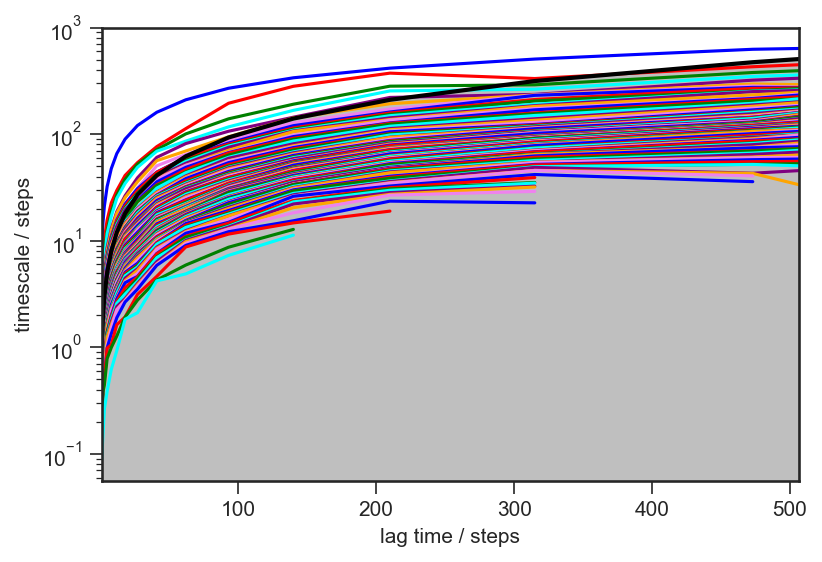

In [277]:
plt.figure(dpi=150)
pyemma.plots.plot_implied_timescales(its)

In [332]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)

In [333]:
pcca = msm.pcca(2)

In [334]:
pcca.coarse_grained_stationary_probability

array([ 0.11731901,  0.88268099])

In [335]:
pcca.metastable_sets

[array([ 1,  5, 30, 56, 87, 88]),
 array([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90,
        91, 92, 93])]

In [336]:
msm.nstates

94

In [285]:
# translate metastable sets to original state indexes

In [337]:
msm.active_set

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       91, 92, 93, 94, 95, 96, 97, 98, 99])

In [338]:
meta_sets = [[], []]

for state in pcca.metastable_sets[0]:
    meta_sets[0].append(msm.active_set[state])
    
for state in pcca.metastable_sets[1]:
    meta_sets[1].append(msm.active_set[state])
    
meta_sets = np.array(meta_sets)    

In [339]:
meta_sets

array([[1, 5, 33, 61, 93, 94],
       [0, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 95, 96, 97, 98, 99]], dtype=object)

In [341]:
# these are the WT ones
meta_sets_wt = np.array([[12, 76, 84],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], dtype=object)

In [305]:
meta_sets_wt

array([[12, 76, 84],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], dtype=object)

In [306]:
# ok so let's see what the population is in both wt and mutant msm

In [311]:
dtrajs2 = np.load('dist2_more_dtrajs.npy')
dtrajs2 = [np.concatenate(x) for x in dtrajs2]

In [312]:
msm2 = pyemma.msm.estimate_markov_model(dtrajs2, lag=200)

In [313]:
dtrajs3 = np.load('distances3_more_dtrajs.npy')
dtrajs3 = [np.concatenate(x) for x in dtrajs3]

In [314]:
msm3 = pyemma.msm.estimate_markov_model(dtrajs3, lag=200)

In [315]:
# we're gonna need state index translating dictionaries

In [320]:
msm2_dict = dict()

for i in range(len(msm2.active_set)):
    msm2_dict[msm2.active_set[i]] = i

In [322]:
msm3_dict = dict()

for i in range(len(msm3.active_set)):
    msm3_dict[msm3.active_set[i]] = i

In [342]:
wt_pops = [0,0]

for state in meta_sets_wt[0]:
    wt_pops[0] += msm2.pi[msm2_dict[state]]
    
for state in meta_sets_wt[1]:
    wt_pops[1] += msm2.pi[msm2_dict[state]]    

In [343]:
wt_pops

[0.0402239739966418, 0.95977602600335843]

In [344]:
mut_pops = [0,0]

for state in meta_sets[0]:
    mut_pops[0] += msm3.pi[msm3_dict[state]]
    
for state in meta_sets[1]:
    mut_pops[1] += msm3.pi[msm3_dict[state]]    

In [345]:
mut_pops

[0.00056983692556166528, 0.99943016307443833]

In [346]:
wt_pops[0] / mut_pops[0]

70.588570505490935

In [348]:
# ok cool - if that less populated state is somehow inactive then this is very good

In [349]:
# let's see what the slowest eigenvector is for the mutant

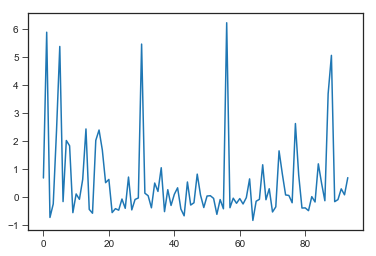

In [350]:
plt.plot(msm3.eigenvectors_right(2)[:,1])

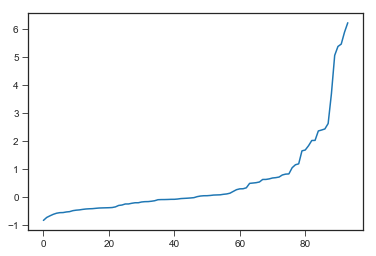

In [354]:
plt.plot(msm3.eigenvectors_right(2)[:,1][np.argsort(msm3.eigenvectors_right(2)[:,1])])

In [352]:
# let's do last 20 states - 25 frames per state

In [ ]:
# quick detour - realized that I shouldn't be using the full metastable set from wt msm, because the interesting
# structural change is 

In [356]:
msm2_dict[76]

74

In [357]:
msm2.pi[74]

0.034549697533319719

In [358]:
msm3_dict[76]

71

In [359]:
msm3.pi[71]

0.0036088285801978461

In [360]:
msm2.pi[74] / msm3.pi[71]

9.5736599191490583

In [368]:
############ back to the trajectory

In [362]:
eigen_traj_end = []

for state in np.argsort(msm3.eigenvectors_right(2)[-20:,1]):
    eigen_traj_end.append(msm3.active_state_indexes[state][np.random.choice(len(msm3.active_state_indexes[state]), 25, replace=True)])

In [365]:
eigen_traj_end = np.concatenate(eigen_traj_end)

In [366]:
eigen_traj_end.shape

(500, 2)

In [367]:
np.save('55n_eigen_traj_end', eigen_traj_end)

In [384]:
# ok now look at mutant's projection onto WT eigenvector - also last 10 states, 50 samples per state

In [388]:
eigen_traj = []

for state in np.argsort(msm2.eigenvectors_right(2)[-10:,1]):
    if msm2.active_set[state] in msm3_dict:
        state_ = msm3_dict[msm2.active_set[state]]
        eigen_traj.append(msm3.active_state_indexes[state_][np.random.choice(len(msm3.active_state_indexes[state_]), 50, replace=True)])

In [389]:
eigen_traj = np.concatenate(eigen_traj)

In [390]:
eigen_traj.shape

(450, 2)

In [391]:
np.save('55n_eigen_traj_WTprojection', eigen_traj)

In [392]:
# traj is pretty much the same as the one along the mutant eigenvector

In [380]:
#############

In [381]:
# now we're going to do it 'from the side' of the mutant - i.e. do tica and kmeans on the mutant data, inspect eigenvector, 
# then transform the WT data with those and inspect both its eigenvector and projection onto mutant eigenvector

In [393]:
# after first looking at full dih models we'll decide whether to do this